## Usar el entorno "entorno_ufv_fastapi"

In [1]:
# Librerías principales
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import os
import random

# Silenciar warnings globales
warnings.filterwarnings('ignore')

# Ajustes visuales para gráficos
sns.set(style='whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['font.size'] = 11

# Configuración de opciones pandas
pd.set_option('display.max_columns', None)
pd.set_option('display.precision', 2)

print("Entorno configurado: sin warnings, visualización optimizada, pandas listo.")


Entorno configurado: sin warnings, visualización optimizada, pandas listo.


### Dataset con correlaciones 

Las correlaciones que vamos a introducir son:

- Edad está negativamente correlacionada con Estado Emocional y ligeramente con Asistencia.

- Estado Emocional, Asistencia y Uso Biblioteca se correlacionan positivamente con las Notas y con Porcentaje de Exámenes Aprobados.

- Abandono está asociado claramente a baja asistencia, bajo estado emocional y rendimiento bajo.

- Beca depende directamente del rendimiento académico, como suma de ambas notas.



### Outliers (atípicos)

🎯 ¿Qué tipo de outliers vamos a introducir?
Notas muy altas con baja asistencia (alguien brillante pero poco presente).

Uso excesivo de biblioteca sin mejora en rendimiento.

Estado emocional bajo pero con notas excelentes (casos excepcionales).

Estudiantes que abandonan con buen promedio académico.

Edad fuera del rango típico de grado (mayores de 38).

Todo esto en pequeñas proporciones (<3%) para no distorsionar la correlación general, pero sí dejar espacio para análisis más matizado.

### Generación de datos

In [2]:
# Semillas para reproducibilidad
np.random.seed(42)
random.seed(42)

# Valores posibles
cursos = ['Primero', 'Segundo', 'Tercero', 'Cuarto', 'Quinto']
grados = ['Grado en Ciencias', 'Grado en Humanidades', 'Grado en Ingeniería', 'Grado en Salud', 'Grado en Empresa']
facultades = ['Ciencias', 'Humanidades', 'Ingeniería', 'Salud', 'Empresariales']
sexos = ['Masculino', 'Femenino']
nacionalidades = ['Española', 'Colombiana', 'Argentina', 'Mexicana', 'Italiana', 'Francesa']
tipos_acceso = ['Examen', 'Convalidación', 'Transferencia']
num_registros = 18000

# Función generadora con correlaciones estructuradas
def generar_estudiante(i):
    edad = np.random.randint(17, 41)

    estado_emocional = max(1, min(5, 6 - int((edad - 17) / 5) + np.random.randint(-1, 2)))
    asistencia = round(np.clip(0.6 + estado_emocional * 0.08 + np.random.normal(0, 0.05), 0.6, 1.0), 2)
    biblioteca = np.random.poisson(lam=estado_emocional + asistencia * 4)
    asignaturas = np.random.randint(6, 12)

    nota1 = round(np.clip(5 + asistencia * 2 + estado_emocional * 0.5 + biblioteca * 0.1 + np.random.normal(0, 0.5), 0, 10), 2)
    nota2 = round(np.clip(nota1 + np.random.normal(0.2, 0.4), 0, 10), 2)

    porcentaje_aprobados = round(np.clip(0.6 + asistencia * 0.3 + estado_emocional * 0.05 + biblioteca / 40, 0, 1), 2)
    abandono = 'Sí' if asistencia < 0.7 and estado_emocional < 2 and nota1 < 5.5 else 'No'
    beca = 'Sí' if nota1 + nota2 > 14.5 else 'No'
    tipo_acceso = random.choices(tipos_acceso, weights=[0.75, 0.15, 0.10])[0]

    return {
        'ID': i + 1,
        'Edad': edad,
        'Curso': random.choice(cursos),
        'Grado': random.choice(grados),
        'Facultad': random.choice(facultades),
        'Sexo': random.choice(sexos),
        'Nacionalidad': random.choice(nacionalidades),
        'Nota Primer Semestre': nota1,
        'Nota Segundo Semestre': nota2,
        'Asignaturas': asignaturas,
        'Porcentaje Exámenes Aprobados': porcentaje_aprobados,
        'Tipo de Acceso': tipo_acceso,
        'Asistencia': asistencia,
        'Uso Biblioteca': int(np.clip(biblioteca, 0, 15)),
        'Beca': beca,
        'Estado Emocional': estado_emocional,
        'Abandono': abandono
    }

# Crear dataset
datos = [generar_estudiante(i) for i in range(num_registros)]
df = pd.DataFrame(datos)

# Crear carpeta y guardar CSV
os.makedirs('data', exist_ok=True)
df.to_csv('data/dataset_estudiantes.csv', index=False, encoding='utf-8-sig')

print(f"Dataset de {num_registros} estudiantes generado y guardado en 'dataset_estudiantes.csv'.")


Dataset de 18000 estudiantes generado y guardado en 'dataset_estudiantes.csv'.


In [3]:
# Ver primeros registros
df.head(5)

,ID,Edad,Curso,Grado,Facultad,Sexo,Nacionalidad,Nota Primer Semestre,Nota Segundo Semestre,Asignaturas,Porcentaje Exámenes Aprobados,Tipo de Acceso,Asistencia,Uso Biblioteca,Beca,Estado Emocional,Abandono
0,1,23,Primero,Grado en Ingeniería,Humanidades,Masculino,Colombiana,9.19,9.16,10,1.00,Examen,0.95,6,Sí,4,No
1,2,37,Quinto,Grado en Ciencias,Empresariales,Femenino,Española,6.83,6.98,8,0.92,Examen,0.65,3,No,1,No
2,3,32,Segundo,Grado en Humanidades,Empresariales,Masculino,Italiana,9.37,9.33,7,1.00,Examen,0.99,5,Sí,4,No
3,4,37,Quinto,Grado en Salud,Humanidades,Femenino,Italiana,7.42,7.46,11,1.00,Examen,0.81,4,Sí,2,No
4,5,20,Primero,Grado en Humanidades,Salud,Femenino,Argentina,10.00,10.00,10,1.00,Examen,0.93,11,Sí,5,No


In [4]:
df.tail(5)

,ID,Edad,Curso,Grado,Facultad,Sexo,Nacionalidad,Nota Primer Semestre,Nota Segundo Semestre,Asignaturas,Porcentaje Exámenes Aprobados,Tipo de Acceso,Asistencia,Uso Biblioteca,Beca,Estado Emocional,Abandono
17995,17996,38,Quinto,Grado en Humanidades,Empresariales,Femenino,Mexicana,8.16,8.10,9,1.0,Examen,0.78,7,Sí,3,No
17996,17997,21,Segundo,Grado en Ciencias,Empresariales,Femenino,Italiana,10.00,9.95,9,1.0,Transferencia,1.00,11,Sí,5,No
17997,17998,24,Quinto,Grado en Ciencias,Ciencias,Masculino,Colombiana,9.62,9.27,7,1.0,Examen,0.95,11,Sí,4,No
17998,17999,19,Cuarto,Grado en Empresa,Ingeniería,Masculino,Española,10.00,9.70,8,1.0,Examen,0.98,7,Sí,5,No
17999,18000,26,Cuarto,Grado en Humanidades,Salud,Masculino,Colombiana,10.00,9.64,8,1.0,Examen,1.00,13,Sí,5,No


## Objetivo del modelo: Predicción de riesgo de abandono
Variable objetivo: Abandono (valores "Sí" o "No") Variables explicativas: Todas las demás columnas del dataset

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import pandas as pd

# Cargar datos
df = pd.read_csv('data/dataset_estudiantes.csv')

# Mapear la variable objetivo antes de codificar el resto
y = df['Abandono'].map({'No': 0, 'Sí': 1})  # binarizada

# Preprocesamiento básico: convertir variables categóricas a numéricas
df_encoded = pd.get_dummies(df.drop(columns=['ID', 'Abandono']), drop_first=True)

# Separar variable objetivo
X = df_encoded
#y = df_encoded['Abandono']  # 1: Abandonó, 0: No

# División train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)



## Objetivo: Problema de clasificación - Predicción de abandono de estudios

### Modelo Random forest classifier

In [6]:
# Modelo
modelo = RandomForestClassifier(n_estimators=100, random_state=42)
modelo.fit(X_train, y_train)

# Predicciones y evaluación
y_pred = modelo.predict(X_test)

# Resultados
print("Clasificación:\n", classification_report(y_test, y_pred,zero_division=0))
# 📚 Explicación breve
print("\n EXPLICACIÓN DE LAS MÉTRICAS:")
print("- Precision: De los estudiantes que el modelo predijo que abandonarían, ¿cuántos realmente lo hicieron?")
print("- Recall: De todos los que realmente abandonaron, ¿cuántos detectó el modelo?")
print("- F1 Score: Equilibrio entre precision y recall. Útil cuando los abandonos son pocos en proporción.")


Clasificación:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      5400

    accuracy                           1.00      5400
   macro avg       1.00      1.00      1.00      5400
weighted avg       1.00      1.00      1.00      5400


 EXPLICACIÓN DE LAS MÉTRICAS:
- Precision: De los estudiantes que el modelo predijo que abandonarían, ¿cuántos realmente lo hicieron?
- Recall: De todos los que realmente abandonaron, ¿cuántos detectó el modelo?
- F1 Score: Equilibrio entre precision y recall. Útil cuando los abandonos son pocos en proporción.


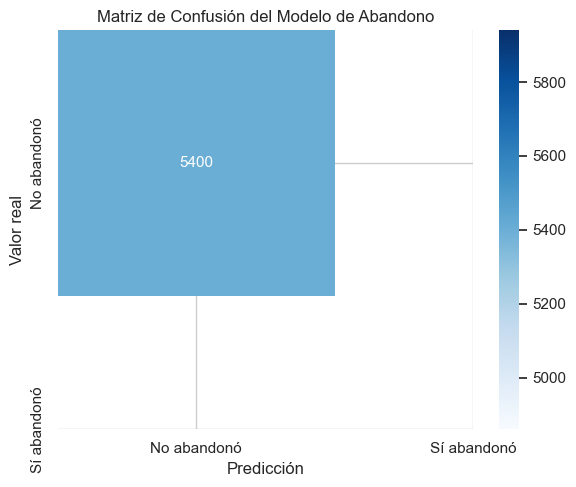

In [7]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Obtener la matriz de confusión
matriz = confusion_matrix(y_test, y_pred)

# Etiquetas
etiquetas = ['No abandonó', 'Sí abandonó']

# Crear mapa de calor
plt.figure(figsize=(6, 5))
sns.heatmap(matriz, annot=True, fmt='d', cmap='Blues', xticklabels=etiquetas, yticklabels=etiquetas)
plt.title('Matriz de Confusión del Modelo de Abandono')
plt.xlabel('Predicción')
plt.ylabel('Valor real')
plt.tight_layout()
plt.show()


## Visualizaciones

### Importancia de variables

- En un modelo como Random Forest es crucial para entender qué factores están contribuyendo más al riesgo de abandono. 
- Dará una visión clara para la universidad, y permitirá tomar decisiones más informadas (campañas de apoyo académico, programas de salud mental, etc.).

Variables más influyentes:

                        Variable  Importancia
0                           Edad          0.0
1           Nota Primer Semestre          0.0
2          Nota Segundo Semestre          0.0
3                    Asignaturas          0.0
4  Porcentaje Exámenes Aprobados          0.0
5                     Asistencia          0.0
6                 Uso Biblioteca          0.0
7               Estado Emocional          0.0
8                  Curso_Primero          0.0
9                   Curso_Quinto          0.0


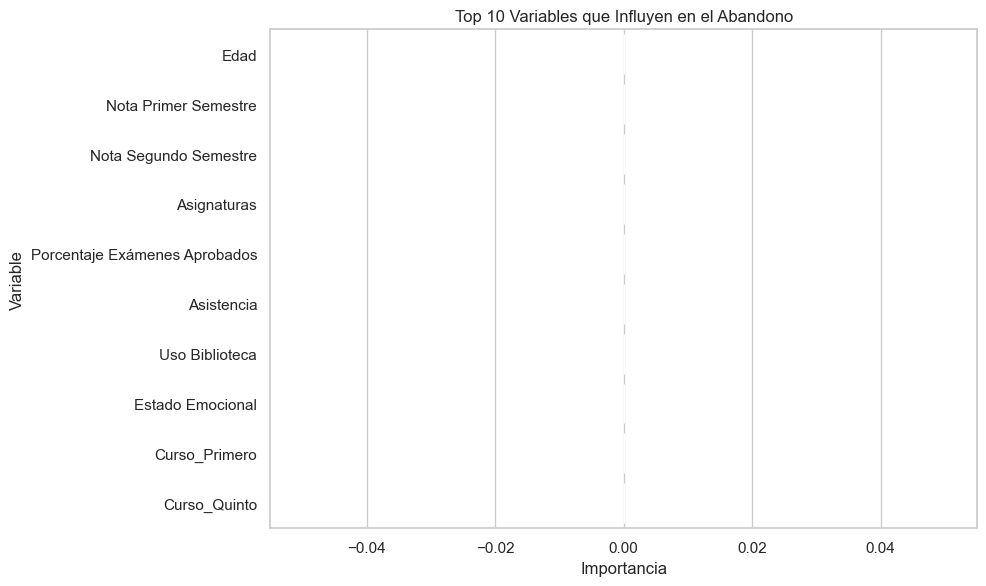

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Extraer importancia de características
importancias = modelo.feature_importances_
nombres_columnas = X.columns

# Crear dataframe ordenado
df_importancia = pd.DataFrame({
    'Variable': nombres_columnas,
    'Importancia': importancias
}).sort_values(by='Importancia', ascending=False)

# Mostrar las 10 más importantes
print("Variables más influyentes:\n")
print(df_importancia.head(10))

# Visualización con gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(x='Importancia', y='Variable', data=df_importancia.head(10), palette='viridis', hue='Variable')
plt.title('Top 10 Variables que Influyen en el Abandono')
plt.xlabel('Importancia')
plt.ylabel('Variable')
plt.tight_layout()
plt.show()


In [9]:
# Recuento de cada clase
recuento_abandono = df['Abandono'].value_counts()
porcentaje_abandono = df['Abandono'].value_counts(normalize=True) * 100

print("Recuento de abandono:")
print(recuento_abandono)
print("\n Porcentaje de abandono:")
print(porcentaje_abandono.round(2))


Recuento de abandono:
Abandono
No    18000
Name: count, dtype: int64

 Porcentaje de abandono:
Abandono
No    100.0
Name: proportion, dtype: float64


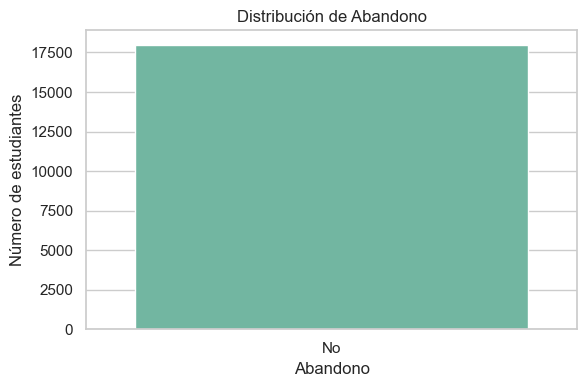

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6,4))
sns.countplot(x='Abandono', data=df, color='salmon', palette='Set2', hue='Abandono')
plt.title('Distribución de Abandono')
plt.xlabel('Abandono')
plt.ylabel('Número de estudiantes')
plt.tight_layout()
plt.show()


### Abandono vs Sexo

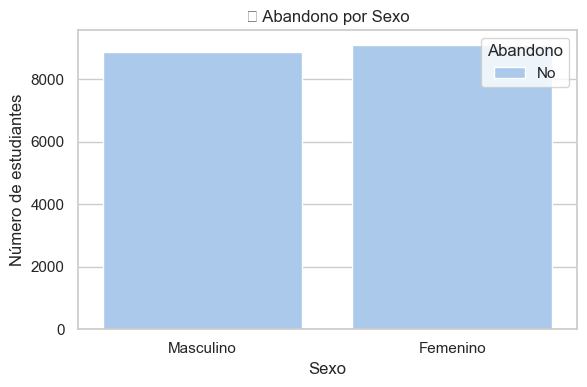

In [11]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Sexo', hue='Abandono', data=df, palette='pastel')
plt.title('👥 Abandono por Sexo')
plt.xlabel('Sexo')
plt.ylabel('Número de estudiantes')
plt.tight_layout()
plt.show()


### Abandono vs Nota Media

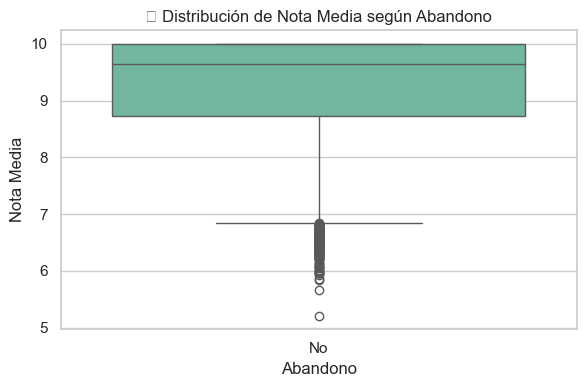

In [12]:
df['Nota Media'] = (df['Nota Primer Semestre'] + df['Nota Segundo Semestre']) / 2

plt.figure(figsize=(6, 4))
sns.boxplot(x='Abandono', y='Nota Media', data=df, palette='Set2', hue='Abandono')
plt.title('📚 Distribución de Nota Media según Abandono')
plt.xlabel('Abandono')
plt.ylabel('Nota Media')
plt.tight_layout()
plt.show()


### Abandono vs Edad

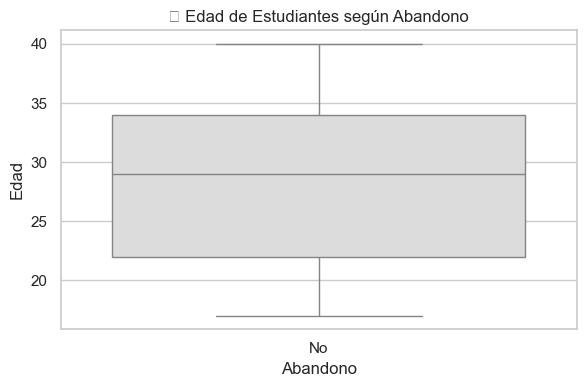

In [13]:
plt.figure(figsize=(6, 4))
sns.boxplot(x='Abandono', y='Edad', data=df, palette='coolwarm', hue='Abandono')
plt.title('🎓 Edad de Estudiantes según Abandono')
plt.xlabel('Abandono')
plt.ylabel('Edad')
plt.tight_layout()
plt.show()


## Objetivo: Predicción de la Nota Media
- Variable objetivo: Nota Media (creada como el promedio de los dos semestres)

- Variables explicativas: todas excepto Nota Primer Semestre, Nota Segundo Semestre, ID, y por supuesto Nota Media

### Modelo base

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import pandas as pd
import numpy as np

# Cargar y preparar datos
df['Nota Media'] = (df['Nota Primer Semestre'] + df['Nota Segundo Semestre']) / 2
df_regresion = df.drop(columns=['ID', 'Nota Primer Semestre', 'Nota Segundo Semestre'])

# Codificar variables categóricas
df_encoded = pd.get_dummies(df_regresion, drop_first=True)

# Separar features y target
X = df_encoded.drop(columns=['Nota Media'])
y = df_encoded['Nota Media']

# División de datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Modelo baseline
modelo_base = LinearRegression()
modelo_base.fit(X_train, y_train)

# Predicciones
y_pred = modelo_base.predict(X_test)

# Evaluación
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

# Resultados
print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.2f}")
print("\n EXPLICACIÓN DE LAS MÉTRICAS:")
print("- MAE: Error promedio absoluto entre predicciones y valores reales.")
print("- RMSE: Raíz del error cuadrático medio, penaliza errores grandes.")
print("- R² Score: Proporción de varianza explicada por el modelo, entre 0 y 1.")


MAE: 0.29
RMSE: 0.39
R² Score: 0.81

 EXPLICACIÓN DE LAS MÉTRICAS:
- MAE: Error promedio absoluto entre predicciones y valores reales.
- RMSE: Raíz del error cuadrático medio, penaliza errores grandes.
- R² Score: Proporción de varianza explicada por el modelo, entre 0 y 1.


### Modelo base con las features del modelo complejo

In [15]:
features_utilizadas = ['Edad', 'Asignaturas', 'Porcentaje Exámenes Aprobados',
                       'Asistencia', 'Uso Biblioteca', 'Estado Emocional']

X = df[features_utilizadas]
y = df['Nota Media']

# División de datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Modelo baseline
modelo_base_feat_util = LinearRegression()
modelo_base_feat_util.fit(X_train, y_train)

# Predicciones
y_pred = modelo_base_feat_util.predict(X_test)

# Evaluación
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

# Resultados
print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.2f}")
print("\n EXPLICACIÓN DE LAS MÉTRICAS:")
print("- MAE: Error promedio absoluto entre predicciones y valores reales.")
print("- RMSE: Raíz del error cuadrático medio, penaliza errores grandes.")
print("- R² Score: Proporción de varianza explicada por el modelo, entre 0 y 1.")

MAE: 0.31
RMSE: 0.41
R² Score: 0.78

 EXPLICACIÓN DE LAS MÉTRICAS:
- MAE: Error promedio absoluto entre predicciones y valores reales.
- RMSE: Raíz del error cuadrático medio, penaliza errores grandes.
- R² Score: Proporción de varianza explicada por el modelo, entre 0 y 1.


### Modelo de regresión más complejo RandomForestRegressor

### Explicación de las métricas

Métrica	Valor	Interpretación

- MAE	0.80	El error promedio entre la nota predicha y la real es de 0.8 puntos. Bastante aceptable como baseline.

- RMSE	0.99	Similar al MAE, pero penaliza más los errores grandes. Casi 1 punto promedio de desviación.

- R² Score	-0.00	Esto indica que el modelo no explica mejor que una línea horizontal (media constante). Está por debajo de cero, lo que sugiere que no está capturando patrones útiles aún.

### Gráficos

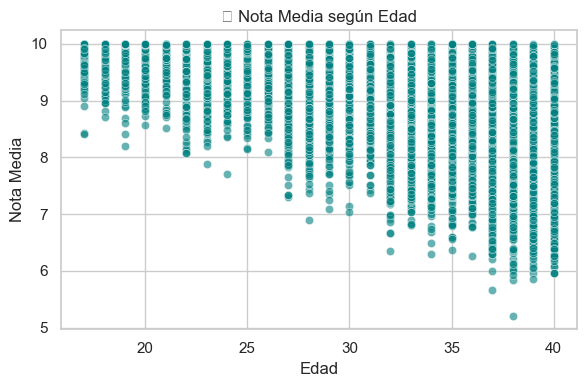

In [16]:
plt.figure(figsize=(6, 4))
sns.scatterplot(x='Edad', y='Nota Media', data=df, color='teal', alpha=0.6)
plt.title('📊 Nota Media según Edad')
plt.xlabel('Edad')
plt.ylabel('Nota Media')
plt.tight_layout()
plt.show()


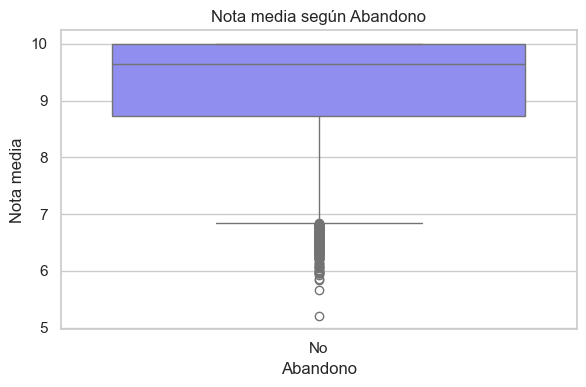

In [17]:
plt.figure(figsize=(6, 4))
sns.boxplot(x='Abandono', y='Nota Media', data=df, palette='cool')
plt.title('Nota media según Abandono')
plt.xlabel('Abandono')
plt.ylabel('Nota media')
plt.tight_layout()
plt.show()


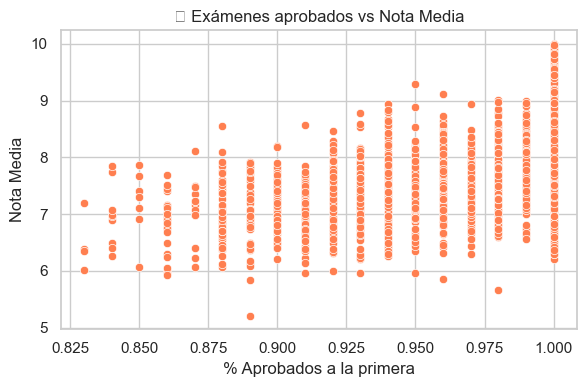

In [18]:
plt.figure(figsize=(6, 4))
sns.scatterplot(x='Porcentaje Exámenes Aprobados', y='Nota Media', data=df, color='coral')
plt.title('✅ Exámenes aprobados vs Nota Media')
plt.xlabel('% Aprobados a la primera')
plt.ylabel('Nota Media')
plt.tight_layout()
plt.show()

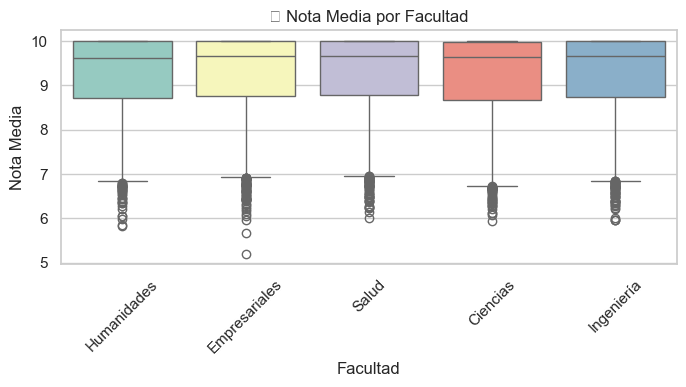

In [19]:
plt.figure(figsize=(7, 4))
sns.boxplot(x='Facultad', y='Nota Media', data=df, palette='Set3')
plt.title('🏫 Nota Media por Facultad')
plt.xlabel('Facultad')
plt.ylabel('Nota Media')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### Matriz de correlación

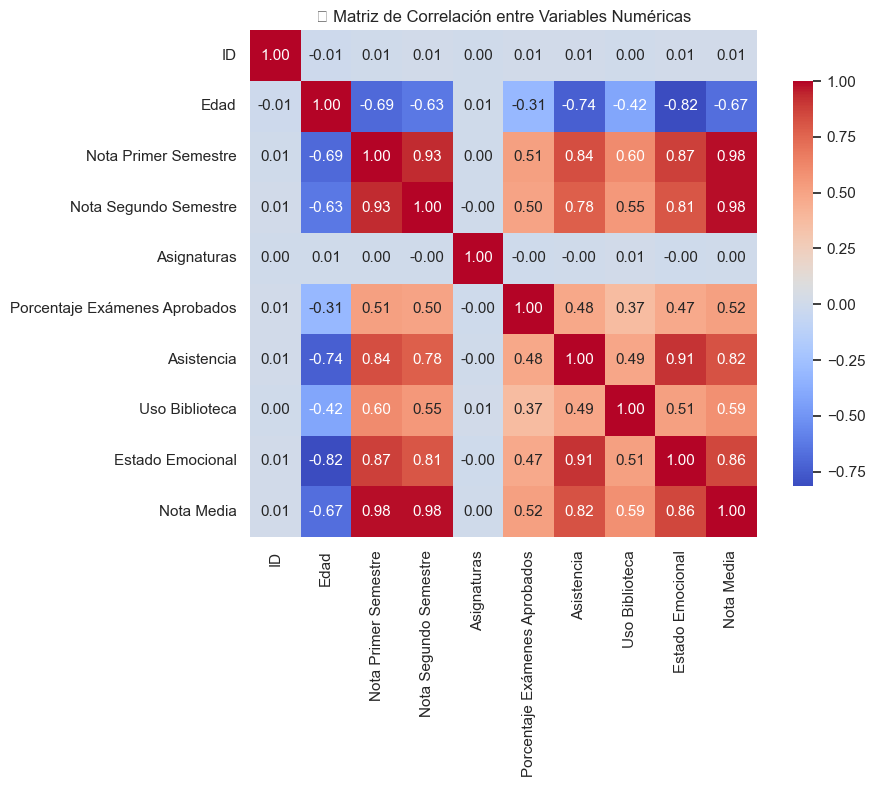

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filtramos solo variables numéricas
df_numericas = df.select_dtypes(include=[np.number])

# Matriz de correlación
correlacion = df_numericas.corr()

# Visualización con mapa de calor
plt.figure(figsize=(10, 8))
sns.heatmap(correlacion, annot=True, fmt=".2f", cmap='coolwarm', square=True,
            cbar_kws={"shrink": 0.8})
plt.title('🔗 Matriz de Correlación entre Variables Numéricas')
plt.tight_layout()
plt.show()


In [21]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import joblib
import numpy as np

# Preparamos los datos
df['Nota Media'] = (df['Nota Primer Semestre'] + df['Nota Segundo Semestre']) / 2
features_utilizadas = ['Edad', 'Asignaturas', 'Porcentaje Exámenes Aprobados',
                       'Asistencia', 'Uso Biblioteca', 'Estado Emocional']

X = df[features_utilizadas]
y = df['Nota Media']

# División en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenar modelo
modelo_rf = RandomForestRegressor(n_estimators=200, random_state=42)
modelo_rf.fit(X_train, y_train)

'''#  Guardar modelo y lista de features
joblib.dump(modelo_rf, "modelo_nota_media.joblib")
joblib.dump(features_utilizadas, "features_modelo.joblib")
print("Modelo actualizado y guardado con las 6 variables.")
'''
# Evaluación
y_pred = modelo_rf.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f" MAE: {mae:.2f}")
print(f" RMSE: {rmse:.2f}")
print(f" R² Score: {r2:.2f}")


 MAE: 0.31
 RMSE: 0.44
 R² Score: 0.75


### Gráfico de residuos

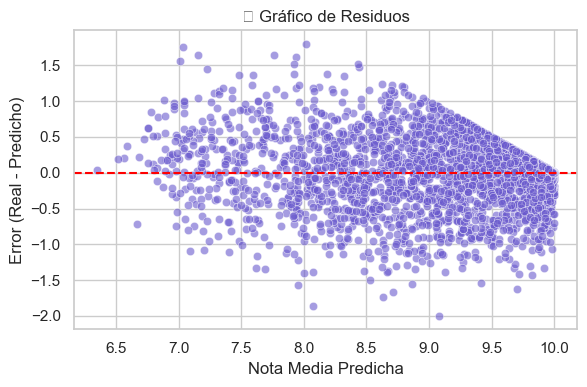

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calcular residuos
residuos = y_test - y_pred

plt.figure(figsize=(6, 4))
sns.scatterplot(x=y_pred, y=residuos, alpha=0.6, color='slateblue')
plt.axhline(0, color='red', linestyle='--')
plt.title('Gráfico de Residuos')
plt.xlabel('Nota Media Predicha')
plt.ylabel('Error (Real - Predicho)')
plt.tight_layout()
plt.show()


### Comparación de valores reales vs. predichos

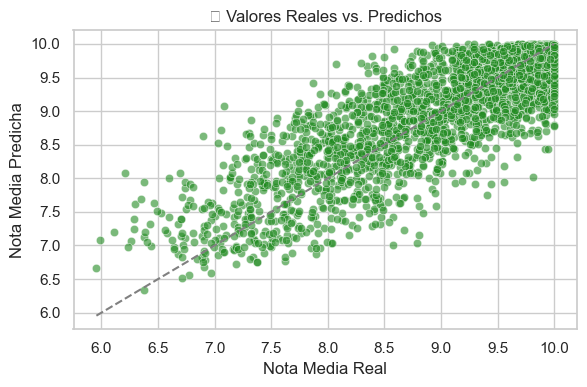

In [23]:
plt.figure(figsize=(6, 4))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6, color='forestgreen')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--', color='gray')
plt.title('Valores Reales vs. Predichos')
plt.xlabel('Nota Media Real')
plt.ylabel('Nota Media Predicha')
plt.tight_layout()
plt.show()


### Guardar los modelos

In [24]:
import joblib

# Crear carpeta 'models' si no existe
os.makedirs("models", exist_ok=True)

# Guardamos el modelo entrenado
joblib.dump(modelo_rf, 'models/modelo_rf_nota_media.joblib') # funciona en fast api
joblib.dump(modelo_base, 'models/modelo_base_nota_media.joblib')  # no funciona en fast api
'''ValueError: The feature names should match those that were passed during fit.
Feature names seen at fit time, yet now missing:
- Beca_Sí
- Curso_Derecho
- Curso_Economía
- Curso_Historia
- Curso_Informática'''
joblib.dump(modelo_base_feat_util, 'models/modelo_base_feat_util_nota_media.joblib') #funciona en fast api, notas muy bajas

# (Opcional) guardar los features usados, si quieres asegurarte de que se pasan correctamente al predecir
joblib.dump(X.columns.tolist(), 'models/features_modelo.joblib')


['models/features_modelo.joblib']

## Pipeline scikit_learn

In [25]:
df.columns

Index(['ID', 'Edad', 'Curso', 'Grado', 'Facultad', 'Sexo', 'Nacionalidad',
       'Nota Primer Semestre', 'Nota Segundo Semestre', 'Asignaturas',
       'Porcentaje Exámenes Aprobados', 'Tipo de Acceso', 'Asistencia',
       'Uso Biblioteca', 'Beca', 'Estado Emocional', 'Abandono', 'Nota Media'],
      dtype='object')

In [26]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer
import joblib

# Cargar datos y calcular la nota media
df = pd.read_csv("data/dataset_estudiantes.csv")
df['Nota Media'] = (df['Nota Primer Semestre'] + df['Nota Segundo Semestre']) / 2

# Variables
variables_numericas = [
    'Edad', 'Asignaturas', 'Porcentaje Exámenes Aprobados',
    'Asistencia', 'Uso Biblioteca', 'Estado Emocional'
]

variables_categoricas = [
    'Curso', 'Grado', 'Facultad', 'Sexo', 'Nacionalidad',
    'Tipo de Acceso', 'Beca', 'Abandono'
]

X = df[variables_numericas + variables_categoricas]
y = df['Nota Media']

# Preprocesadores
preprocesador_numerico = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

preprocesador_categorico = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

preprocesamiento = ColumnTransformer(transformers=[
    ('num', preprocesador_numerico, variables_numericas),
    ('cat', preprocesador_categorico, variables_categoricas)
])

pipeline_modelo = Pipeline(steps=[
    ('preprocesamiento', preprocesamiento),
    ('modelo', LinearRegression())
])

# Entrenamiento
pipeline_modelo.fit(X, y)

# Guardar el pipeline
joblib.dump(pipeline_modelo, 'models/pipeline_nota_media.joblib')
print("Modelo guardado en models/pipeline_nota_media.joblib")


Modelo guardado en models/pipeline_nota_media.joblib


In [27]:
# unqieu values of every categorical column
for col in df.select_dtypes(include=['object']).columns:
    print(f"{col}: {df[col].nunique()} valores únicos")
    print(df[col].unique())
    print("---" * 20)

Curso: 5 valores únicos
['Primero' 'Quinto' 'Segundo' 'Tercero' 'Cuarto']
------------------------------------------------------------
Grado: 5 valores únicos
['Grado en Ingeniería' 'Grado en Ciencias' 'Grado en Humanidades'
 'Grado en Salud' 'Grado en Empresa']
------------------------------------------------------------
Facultad: 5 valores únicos
['Humanidades' 'Empresariales' 'Salud' 'Ciencias' 'Ingeniería']
------------------------------------------------------------
Sexo: 2 valores únicos
['Masculino' 'Femenino']
------------------------------------------------------------
Nacionalidad: 6 valores únicos
['Colombiana' 'Española' 'Italiana' 'Argentina' 'Francesa' 'Mexicana']
------------------------------------------------------------
Tipo de Acceso: 3 valores únicos
['Examen' 'Convalidación' 'Transferencia']
------------------------------------------------------------
Beca: 2 valores únicos
['Sí' 'No']
------------------------------------------------------------
Abandono: 1 valores

In [28]:
a = len(df)
a

18000

In [29]:
# numero de columnas de df
b = num_columnas = len(df.columns)
print(b)

18


In [30]:
print(f'El número de data points es {a*b}')

El número de data points es 324000


## Crear API REST con Fast API

In [31]:
#!pip install fastapi uvicorn joblib scikit-learn pandas


In [33]:
from fastapi import FastAPI
from pydantic import BaseModel
import joblib
import pandas as pd

# Cargar modelo y columnas
modelo = joblib.load('models/modelo_base_nota_media.joblib')
features = joblib.load('models/features_modelo.joblib')
codigo_api = """
from fastapi import FastAPI
from pydantic import BaseModel
import joblib
import pandas as pd

# Cargar modelo y columnas
modelo = joblib.load('modelo_nota_media.joblib')
features = joblib.load('features_modelo.joblib')

app = FastAPI(title="Predicción de Nota Media", description="API REST para estudiantes", version="1.0")

class Estudiante(BaseModel):
    Edad: int
    Asignaturas: int
    Porcentaje_Exámenes_Aprobados: float
    Asistencia: float
    Uso_Biblioteca: int
    Estado_Emocional: int

@app.post("/predecir")
def predecir_nota(data: Estudiante):
    datos = pd.DataFrame([data.dict()])
    for col in features:
        if col not in datos.columns:
            datos[col] = 0
    datos = datos[features]
    prediccion = modelo.predict(datos)[0]
    return {"Nota Media Estimada": round(prediccion, 2)}
"""

# Crear archivo main.py
with open("main.py", "w", encoding="utf-8") as f:
    f.write(codigo_api)
print("Archivo 'main.py' creado correctamente.")


Archivo 'main.py' creado correctamente.


### Ejecutar:
uvicorn main:app --reload
Ir a: 
http://localhost:8000/docs

In [35]:
import joblib
features = joblib.load('models/features_modelo.joblib')
print(features)

['Edad', 'Asignaturas', 'Porcentaje Exámenes Aprobados', 'Asistencia', 'Uso Biblioteca', 'Estado Emocional']


## Celda de prueba para simular entradas al modelo

In [39]:
'''
"Explicación del proyecto.md"import joblib
import pandas as pd

# Cargar el modelo y las columnas que espera
modelo = joblib.load("models/modelo_base_nota_media.joblib")
features = joblib.load("models/features_modelo.joblib")

# Simular entradas distintas
entrada1 = {
    "Edad": 20,
    "Asignaturas": 6,
    "Porcentaje Exámenes Aprobados": 0.85,
    "Asistencia": 0.95,
    "Uso Biblioteca": 4,
    "Estado Emocional": 4
}

entrada2 = {
    "Edad": 35,
    "Asignaturas": 10,
    "Porcentaje Exámenes Aprobados": 0.65,
    "Asistencia": 0.65,
    "Uso Biblioteca": 1,
    "Estado Emocional": 2
}

# 📊 Convertir en DataFrames
df1 = pd.DataFrame([entrada1])[features]
df2 = pd.DataFrame([entrada2])[features]

# 📤 Obtener predicciones
pred1 = modelo.predict(df1)[0]
pred2 = modelo.predict(df2)[0]

# 📢 Mostrar resultados
print(f"🎓 Entrada 1 → Predicción: {round(pred1, 2)}")
print(f"🎓 Entrada 2 → Predicción: {round(pred2, 2)}")
'''


'\n"Explicación del proyecto.md"import joblib\nimport pandas as pd\n\n# Cargar el modelo y las columnas que espera\nmodelo = joblib.load("models/modelo_base_nota_media.joblib")\nfeatures = joblib.load("models/features_modelo.joblib")\n\n# Simular entradas distintas\nentrada1 = {\n    "Edad": 20,\n    "Asignaturas": 6,\n    "Porcentaje Exámenes Aprobados": 0.85,\n    "Asistencia": 0.95,\n    "Uso Biblioteca": 4,\n    "Estado Emocional": 4\n}\n\nentrada2 = {\n    "Edad": 35,\n    "Asignaturas": 10,\n    "Porcentaje Exámenes Aprobados": 0.65,\n    "Asistencia": 0.65,\n    "Uso Biblioteca": 1,\n    "Estado Emocional": 2\n}\n\n# 📊 Convertir en DataFrames\ndf1 = pd.DataFrame([entrada1])[features]\ndf2 = pd.DataFrame([entrada2])[features]\n\n# 📤 Obtener predicciones\npred1 = modelo.predict(df1)[0]\npred2 = modelo.predict(df2)[0]\n\n# 📢 Mostrar resultados\nprint(f"🎓 Entrada 1 → Predicción: {round(pred1, 2)}")\nprint(f"🎓 Entrada 2 → Predicción: {round(pred2, 2)}")\n'